d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 2s 944us/step - loss: 0.2395 - accuracy: 0.9339 - val_loss: 0.2661 - val_accuracy: 0.9269


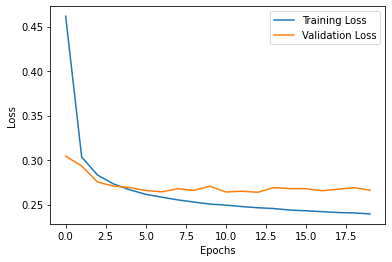

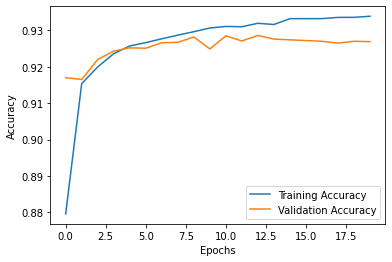

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 2s 1ms/step - loss: 3.3405 - accuracy: 0.7552 - val_loss: 0.2711 - val_accuracy: 0.9265


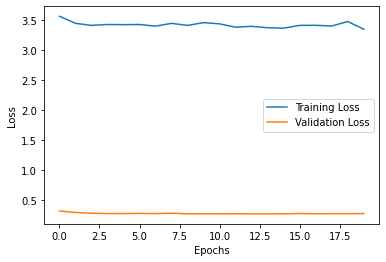

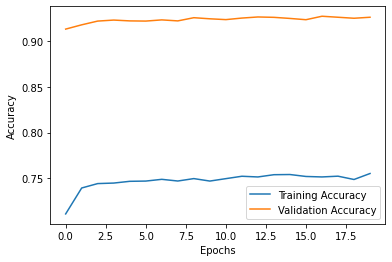

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
Total params: 7,890
Trainable params: 7,870
Non-trainable params: 20
_________________________________________________________________
1875/1875 [==============================] - 3s 1ms/step - loss: 6.5558 - accuracy: 0.0975 - val_loss: 6.5939 - val_accuracy: 0.0975


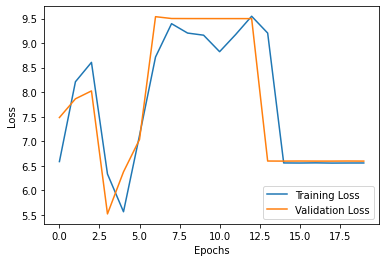

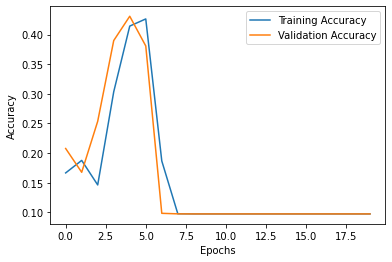

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the softmax regression model
def softmax_regression_model(input_shape=(784, )):
    model = models.Sequential([
        layers.Dense(10, activation='softmax', input_shape=input_shape)
    ])
    return model

# Define the model with dropout
def softmax_regression_model_with_dropout(input_shape=(784, ), dropout_rate=0.2):
    model = models.Sequential([
        layers.Dense(10, activation='softmax', input_shape=input_shape),
        layers.Dropout(dropout_rate)
    ])
    return model

# Define the model with batch normalization
def softmax_regression_model_with_batch_norm(input_shape=(784, )):
    model = models.Sequential([
        layers.Dense(10, activation='softmax', input_shape=input_shape),
        layers.BatchNormalization()
    ])
    return model

# Train and evaluate the models
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    # Lists to store values for plotting
    train_loss_values = []
    train_accuracy_values = []
    val_loss_values = []
    val_accuracy_values = []
    for epoch in range(20):
        history = model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=1, validation_data=(x_test, y_test))
        # Store values for this epoch
        train_loss_values.append(history.history['loss'][0])
        train_accuracy_values.append(history.history['accuracy'][0])
        val_loss_values.append(history.history['val_loss'][0])
        val_accuracy_values.append(history.history['val_accuracy'][0])
    # Plot loss
    plt.plot(train_loss_values, label='Training Loss')
    plt.plot(val_loss_values, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.plot(train_accuracy_values, label='Training Accuracy')
    plt.plot(val_accuracy_values, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Train and evaluate the softmax regression model
softmax_reg_model = softmax_regression_model()
train_and_evaluate(softmax_reg_model, x_train, y_train, x_test, y_test)

# Train and evaluate the softmax regression model with dropout
softmax_reg_model_with_dropout = softmax_regression_model_with_dropout(dropout_rate=0.2)
train_and_evaluate(softmax_reg_model_with_dropout, x_train, y_train, x_test, y_test)

# Train and evaluate the softmax regression model with batch normalization
softmax_reg_model_with_batch_norm = softmax_regression_model_with_batch_norm()
train_and_evaluate(softmax_reg_model_with_batch_norm, x_train, y_train, x_test, y_test)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.1490 - val_accuracy: 0.9755


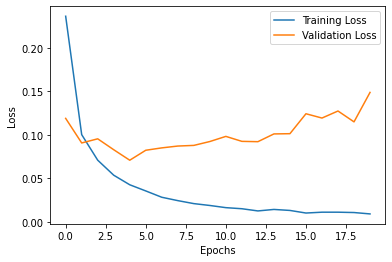

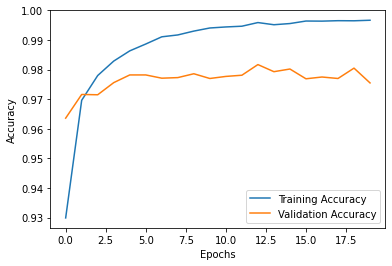

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

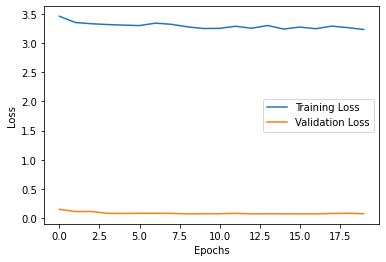

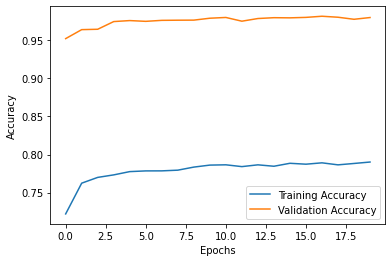

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 110,154
Trainable params: 109,770
Non-trainable params: 384
_________________________________________________________________
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.0792 - 

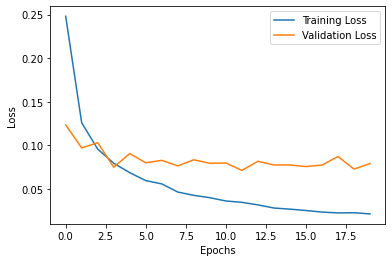

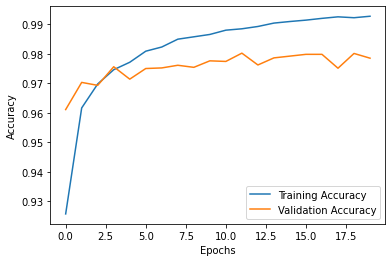

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the MLP model
def mlp_model(input_shape=(784, )):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Define the MLP model with dropout
def mlp_model_with_dropout(input_shape=(784, ), dropout_rate=0.2):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax'),
        layers.Dropout(dropout_rate)
    ])
    return model

# Define the MLP model with batch normalization
def mlp_model_with_batch_norm(input_shape=(784, )):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate the models
# Train and evaluate the models
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    # Lists to store values for plotting
    train_loss_values = []
    train_accuracy_values = []
    val_loss_values = []
    val_accuracy_values = []
    for epoch in range(20):
        history = model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=1, validation_data=(x_test, y_test))
        # Store values for this epoch
        train_loss_values.append(history.history['loss'][0])
        train_accuracy_values.append(history.history['accuracy'][0])
        val_loss_values.append(history.history['val_loss'][0])
        val_accuracy_values.append(history.history['val_accuracy'][0])
    # Plot loss
    plt.plot(train_loss_values, label='Training Loss')
    plt.plot(val_loss_values, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.plot(train_accuracy_values, label='Training Accuracy')
    plt.plot(val_accuracy_values, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Train and evaluate the MLP model
mlp_model = mlp_model()
train_and_evaluate(mlp_model, x_train, y_train, x_test, y_test)

# Train and evaluate the MLP model with dropout
mlp_model_with_dropout = mlp_model_with_dropout(dropout_rate=0.2)
train_and_evaluate(mlp_model_with_dropout, x_train, y_train, x_test, y_test)

# Train and evaluate the MLP model with batch normalization
mlp_model_with_batch_norm = mlp_model_with_batch_norm()
train_and_evaluate(mlp_model_with_batch_norm, x_train, y_train, x_test, y_test)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0881 - 

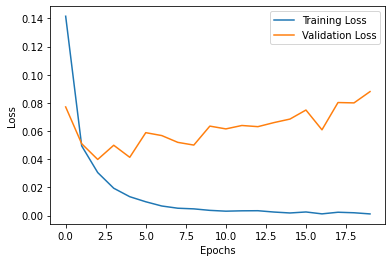

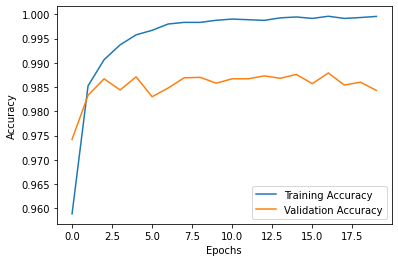

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

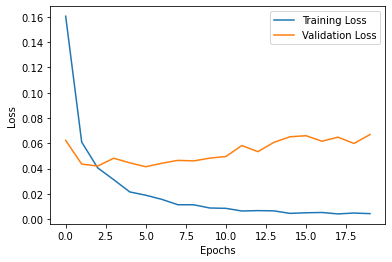

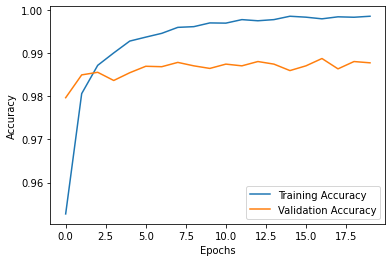

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               692352    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

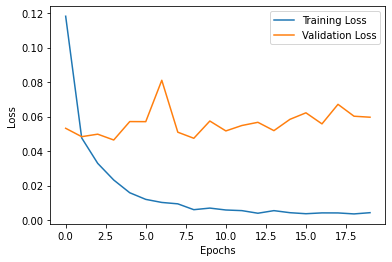

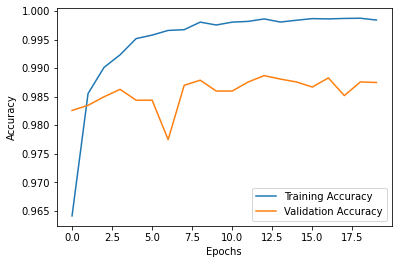

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
def cnn_model(input_shape=(28, 28, 1)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Define the CNN model with dropout
def cnn_model_with_dropout(input_shape=(28, 28, 1), dropout_rate=0.2):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Define the CNN model with batch normalization
def cnn_model_with_batch_norm(input_shape=(28, 28, 1)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate the models
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    # Lists to store values for plotting
    train_loss_values = []
    train_accuracy_values = []
    val_loss_values = []
    val_accuracy_values = []
    for epoch in range(20):
        history = model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=1, validation_data=(x_test, y_test))
        # Store values for this epoch
        train_loss_values.append(history.history['loss'][0])
        train_accuracy_values.append(history.history['accuracy'][0])
        val_loss_values.append(history.history['val_loss'][0])
        val_accuracy_values.append(history.history['val_accuracy'][0])
    # Plot loss
    plt.plot(train_loss_values, label='Training Loss')
    plt.plot(val_loss_values, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.plot(train_accuracy_values, label='Training Accuracy')
    plt.plot(val_accuracy_values, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Train and evaluate the CNN model
cnn_model = cnn_model()
train_and_evaluate(cnn_model, x_train, y_train, x_test, y_test)

# Train and evaluate the CNN model with dropout
cnn_model_with_dropout = cnn_model_with_dropout(dropout_rate=0.2)
train_and_evaluate(cnn_model_with_dropout, x_train, y_train, x_test, y_test)

# Train and evaluate the CNN model with batch normalization
cnn_model_with_batch_norm = cnn_model_with_batch_norm()
train_and_evaluate(cnn_model_with_batch_norm, x_train, y_train, x_test, y_test)
